# Week 14: Data Pre-Processing & Regression - Student Assignments

## Overview
This document contains practical tasks, assignments, and assessments designed to test your understanding of data preprocessing techniques and regression analysis covered in Week 14.

## Part 1: Tasks

### Task 1: Missing Data Management
**Objective**: Practice handling missing values in datasets

**Dataset**: `Task-Datasets/task1_data_with_missing.csv`

**Instructions**:
1. Load the provided dataset (15 rows with Name, Age, City, Income, Product_Rating)
2. The dataset already contains missing values
3. Handle the missing values using:
   - Mean imputation
   - Mode imputation
4. Document your approach


In [260]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
# Load the dataset

taskData = pd.read_csv(r"C:\Users\USER\Desktop\DataraFlow Internship\GitHub Pushing\Week 14\Week-14-Take-Home\Task-Datasets\task1_data_with_missing.csv")

# print the first 5 rows
taskData.head()

,Name,Age,City,Income,Product_Rating
0,John,25.0,New York,45000.0,4.5
1,Sarah,32.0,Los Angeles,62000.0,4.8
2,Mike,NaN,Chicago,55000.0,4.2
3,Emily,28.0,Houston,NaN,4.7
4,David,45.0,Phoenix,78000.0,NaN


In [262]:
# check the summary statistics of the data

taskData.describe(include='all')

,Name,Age,City,Income,Product_Rating
count,15,12.000000,14,12.000000,13.000000
unique,15,NaN,14,NaN,NaN
top,John,NaN,New York,NaN,NaN
freq,1,NaN,1,NaN,NaN
mean,NaN,34.000000,NaN,61416.666667,4.515385
std,NaN,6.687845,NaN,10849.870827,0.260916
min,NaN,25.000000,NaN,45000.000000,4.100000
25%,NaN,28.750000,NaN,54000.000000,4.300000
50%,NaN,32.500000,NaN,60500.000000,4.500000
75%,NaN,38.750000,NaN,69750.000000,4.700000


In [263]:
# check the data information

taskData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            15 non-null     object 
 1   Age             12 non-null     float64
 2   City            14 non-null     object 
 3   Income          12 non-null     float64
 4   Product_Rating  13 non-null     float64
dtypes: float64(3), object(2)
memory usage: 732.0+ bytes


- It is observed that the **Age** column has 3 missing values, **City** has 1 missing value, **Income** has 3 missing values, and **Product_rating** has 2 missing values

## Handling Missing Values

- Since the features having missing values comprise of both numerical and categorical variables, we choose to fill the numerical variables with its mean and the categorical variable with its mode

In [264]:
# import the library to handle missing values
from sklearn.impute import SimpleImputer

# create an imputer object with a mean filling strategy
num_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
# fit the imputer object to the numerical columns (2nd, 4th, and 5th columns) and transform the data
taskData.iloc[:, [1,3,4]] = num_imputer.fit_transform(taskData.iloc[:, [1,3,4]])

In [265]:
# verify that there are no missing values in the numerical columns

taskData

,Name,Age,City,Income,Product_Rating
0,John,25.0,New York,45000.000000,4.500000
1,Sarah,32.0,Los Angeles,62000.000000,4.800000
2,Mike,34.0,Chicago,55000.000000,4.200000
3,Emily,28.0,Houston,61416.666667,4.700000
4,David,45.0,Phoenix,78000.000000,4.515385
5,Lisa,35.0,NaN,67000.000000,4.600000
6,Tom,29.0,Philadelphia,51000.000000,4.300000
7,Anna,34.0,San Antonio,59000.000000,4.900000
8,Chris,41.0,San Diego,72000.000000,4.100000
9,Jessica,33.0,Dallas,61416.666667,4.800000


In [266]:
# import the library to handle missing values
from sklearn.impute import SimpleImputer

# create an imputer object with a mode filling strategy
cat_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
# fit the imputer object to the categorical column (3rd column) and transform the data
taskData.iloc[:, 2] = cat_imputer.fit_transform(taskData.iloc[:, 2].values.reshape(-1,1))

In [267]:
taskData.iloc[:, 2]

0          New York
1       Los Angeles
2           Chicago
3           Houston
4           Phoenix
5            Austin
6      Philadelphia
7       San Antonio
8         San Diego
9            Dallas
10         San Jose
11           Austin
12     Jacksonville
13    San Francisco
14     Indianapolis
Name: City, dtype: object

## Approach to Task 1

#### Library Importation

Understanding the nature of the task I want to solve, I began by importing the basic libraries: numpy, pandas and matplotlib.

#### Dataset

The dataset to be used for the tasks has 15 records (rows) and 5 features (column). Out of the 5 features, three (`Age, Income and Product_Rating`) are numerical in nature while `City` is categorical and `Name` is string.

Inspecting the dataset by using the `.info()` method, I observed that four (three numerical and 1 categorical) columns has missing values.

#### Handling Missing Values

There are multiple ways to address missing values in a dataset which could include any of the following: dropping them, filling with a constant, forward and backward filling or filling with a statistic. For the purpose of this task, we would be filling with the mean and mode which are the best statistical measure for numerical and categorical variables respectively.

I imported the `SimpleImputer` class from the `sklearn.impute` module, I then created two imputer objects, one for the numerical features and another for the categorical feature.

I specified the stratagy argument for the numerical and categorical feature as `mean` and `most_frequent` respectively. I then fitted the object on the specific columns

#### Conclusion

I verified that the imputation was done accurately by viewing the dataset

### Task 2: Encoding Categorical Variables
**Objective**: Master encoding techniques for categorical data

**Dataset**: `Task-Datasets/task2_categorical_data.csv`

**Instructions**:
1. Load the provided dataset with:
   - Categorical independent variables: City, Product_Type
   - Categorical dependent variable: Purchased (Yes/No)
   - Numerical features: Age, Purchase_Amount
2. Apply OneHotEncoder to City and Product_Type
3. Apply LabelEncoder to the Purchased variable
4. Print the shapes and first 5 rows before and after encoding


In [268]:
# Load the dataset

task2Data = pd.read_csv(r"C:\Users\USER\Desktop\DataraFlow Internship\GitHub Pushing\Week 14\Week-14-Take-Home\Task-Datasets\task2_categorical_data.csv")

# print the first 5 rows
task2Data.head()

,CustomerID,City,Product_Type,Age,Purchase_Amount,Purchased
0,C001,Mumbai,Electronics,28,15000,Yes
1,C002,Delhi,Clothing,35,3500,No
2,C003,Bangalore,Electronics,42,22000,Yes
3,C004,Mumbai,Furniture,29,8500,No
4,C005,Chennai,Electronics,31,18000,Yes


In [269]:
# Check the dataset information

task2Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       20 non-null     object
 1   City             20 non-null     object
 2   Product_Type     20 non-null     object
 3   Age              20 non-null     int64 
 4   Purchase_Amount  20 non-null     int64 
 5   Purchased        20 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


In [270]:
# split the data into features and target variable
X = task2Data.iloc[:, :-1].values
Y = task2Data.iloc[:, -1].values

In [271]:
# Encoding Categorical Features

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# create a column transformer with one-hot encoding for categorical features
ct = ColumnTransformer(transformers=[('one_hot_encoder', OneHotEncoder(), [1,2])], remainder="passthrough")

# fit and transform the features
X_encod = np.array(ct.fit_transform(X))

In [272]:
# Encoding the Target Variable

from sklearn.preprocessing import LabelEncoder

# create a label encoder object
label_encoder = LabelEncoder()

# fit and transform the target variable
Y_encod = label_encoder.fit_transform(Y)

In [273]:
# print the shapes of X and Y before encoding

print("Shape of X before encoding:", X.shape)
print("Shape of Y before encoding:", Y.shape)
print("---------------------------------")
# print the shape of the encoded features and target variable
print("Shape of X after encoding", X_encod.shape)
print("Shape of Y after encoding", Y_encod.shape)

Shape of X before encoding: (20, 5)
Shape of Y before encoding: (20,)
---------------------------------
Shape of X after encoding (20, 10)
Shape of Y after encoding (20,)


In [274]:
# print the first 5 rows of X and Y before encoding
print(X[:5])
print("-------------------------")
print(Y[:5])

[['C001' 'Mumbai' 'Electronics' 28 15000]
 ['C002' 'Delhi' 'Clothing' 35 3500]
 ['C003' 'Bangalore' 'Electronics' 42 22000]
 ['C004' 'Mumbai' 'Furniture' 29 8500]
 ['C005' 'Chennai' 'Electronics' 31 18000]]
-------------------------
['Yes' 'No' 'Yes' 'No' 'Yes']


In [275]:
# print the first 5 rows of X and Y after encoding
print(X_encod[:5])
print("-------------------------")
print(Y_encod[:5])

[[0.0 0.0 0.0 1.0 0.0 1.0 0.0 'C001' 28 15000]
 [0.0 0.0 1.0 0.0 1.0 0.0 0.0 'C002' 35 3500]
 [1.0 0.0 0.0 0.0 0.0 1.0 0.0 'C003' 42 22000]
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0 'C004' 29 8500]
 [0.0 1.0 0.0 0.0 0.0 1.0 0.0 'C005' 31 18000]]
-------------------------
[1 0 1 0 1]


### Task 3: Feature Scaling Comparison
**Objective**: Understand the impact of feature scaling

**Dataset**: `Task-Datasets/task3_scaling_data.csv`

**Instructions**:
1. Load the provided dataset with features on different scales:
   - Age: 23-46
   - Annual_Salary: 32,000-108,000
   - Years_Experience: 1-23
   - Performance_Score: 71-95
2. Split the data into training and test sets (80/20)
3. Apply `StandardScaler` to both sets
4. Create visualizations showing:
   - Original data distribution
   - Scaled data distribution
5. Calculate and display the mean and standard deviation before and after scaling

In [276]:
# Load the dataset

task3Data = pd.read_csv(r"C:\Users\USER\Desktop\DataraFlow Internship\GitHub Pushing\Week 14\Week-14-Take-Home\Task-Datasets\task3_scaling_data.csv")

# print the first 5 rows of the data
task3Data.head()

,EmployeeID,Age,Annual_Salary,Years_Experience,Performance_Score
0,E001,23,32000,1,72
1,E002,28,45000,4,78
2,E003,35,68000,10,85
3,E004,42,95000,18,92
4,E005,29,48000,5,76


In [277]:
# check the basic summary statistics of the data
task3Data.describe()

,Age,Annual_Salary,Years_Experience,Performance_Score
count,25.000000,25.000000,25.000000,25.000000
mean,34.280000,66920.000000,10.480000,83.480000
std,7.009042,23806.371696,6.964912,7.544976
min,23.000000,32000.000000,1.000000,71.000000
25%,29.000000,48000.000000,5.000000,77.000000
50%,34.000000,65000.000000,10.000000,84.000000
75%,40.000000,88000.000000,16.000000,90.000000
max,46.000000,108000.000000,23.000000,95.000000


In [278]:
# split the dataset into features and target variable

X = task3Data.iloc[:,1:-1].values
Y = task3Data.iloc[:,-1].values

In [279]:
# splitting the dataset into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [280]:
# Applying StandardScaler to both sets

from sklearn.preprocessing import StandardScaler

# create the StandardScaler object
scaler = StandardScaler()

# fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# transform the test set
X_test_scaled = scaler.transform(X_test)

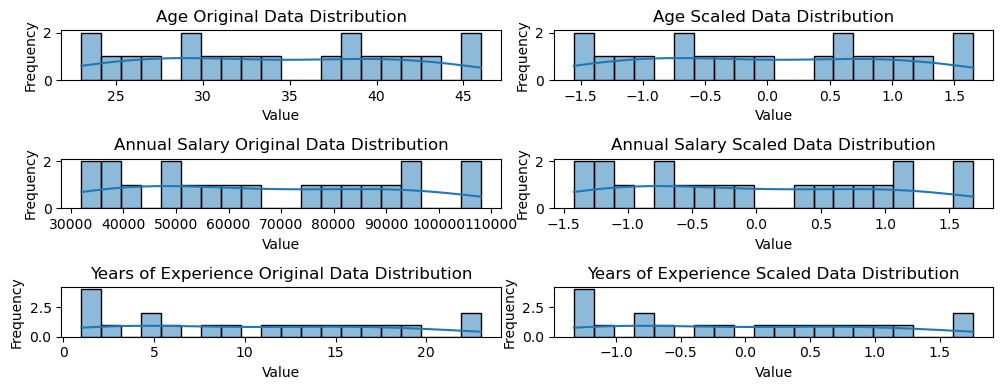

In [281]:
# plot the distribution of the scaled and original data

# import the matplotlib library
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots 
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 4))

# Plot the Age original data on the first row, first column
sns.histplot(X_train[:,0], bins=20, kde=True, ax=ax[0,0])
ax[0,0].set_title('Age Original Data Distribution')
ax[0,0].set_xlabel('Value')
ax[0,0].set_ylabel('Frequency')


# Plot the Age Scaled data on the first row, second column
sns.histplot(X_train_scaled[:,0], bins=20, kde=True,ax=ax[0,1])
ax[0,1].set_title('Age Scaled Data Distribution')
ax[0,1].set_xlabel('Value')
ax[0,1].set_ylabel('Frequency')


# Plot the Annual Salary original data on the second row, first column
sns.histplot(X_train[:,1], bins=20, kde=True, ax=ax[1,0])
ax[1,0].set_title('Annual Salary Original Data Distribution')
ax[1,0].set_xlabel('Value')
ax[1,0].set_ylabel('Frequency')


# Plot the Annual Salary Scaled data on the second row, second column
sns.histplot(X_train_scaled[:,1], bins=20, kde=True,ax=ax[1,1])
ax[1,1].set_title('Annual Salary Scaled Data Distribution')
ax[1,1].set_xlabel('Value')
ax[1,1].set_ylabel('Frequency')


# Plot the Years_Experience original data on the third row, first column
sns.histplot(X_train[:,2], bins=20, kde=True, ax=ax[2,0])
ax[2,0].set_title('Years of Experience Original Data Distribution')
ax[2,0].set_xlabel('Value')
ax[2,0].set_ylabel('Frequency')


# Plot the Years_Experience Scaled data on the third row, second column
sns.histplot(X_train_scaled[:,2], bins=20, kde=True,ax=ax[2,1])
ax[2,1].set_title('Years of Experience Scaled Data Distribution')
ax[2,1].set_xlabel('Value')
ax[2,1].set_ylabel('Frequency')




# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [282]:
# Set options to suppress scientific notation
np.set_printoptions(suppress=True)

# print the mean and standard deviation of the original data
print(f"The mean of each feature of the original data are: {np.mean(X_train, axis=0)}")
print(f"The standard deviation of each feature of the original data are: {np.std(X_train, axis=0)}")

The mean of each feature of the original data are: [   34.15 66750.      10.45]
The standard deviation of each feature of the original data are: [    7.178266 24480.349262     7.130743]


In [283]:
# print the mean and standard deviation of the scaled data
print(f"The mean of each feature of the scaled data are: {np.mean(X_train_scaled, axis=0)}")
print(f"The standard deviation of each feature of the scaled data are: {np.std(X_train_scaled, axis=0)}")

The mean of each feature of the scaled data are: [ 0. -0.  0.]
The standard deviation of each feature of the scaled data are: [1. 1. 1.]


## Part 2: Assignments

### Assignment 1: Complete Data Preprocessing Pipeline
**Objective**: Build an end-to-end preprocessing workflow

**Scenario**: You have been provided with a messy customer dataset for an e-commerce company. The dataset contains information about customers including demographics, purchase history, and whether they made a repeat purchase.

**Dataset**: `Assignment-Datasets/assignment1_ecommerce_data.csv`

**Dataset Description**:
- **Check Data Dictionary**

**Tasks**:
1. **Data Loading & Exploration**:
   - Load the dataset
   - Display basic information (shape, data types, missing values count)
   - Show statistical summary

2. **Handle Missing Data**:
   - Identify columns with missing values
   - Apply appropriate imputation strategy
   - Justify your choice of strategy

3. **Encode Categorical Variables**:
   - Encode using OneHotEncoder
   - Encode LabelEncoder
   - Handle the dummy variable trap

4. **Split Dataset**:
   - Create training and test sets (70/30 split)
   - Set random_state=42 for reproducibility

5. **Feature Scaling**:
   - Apply StandardScaler to numerical features
   - Ensure proper fit/transform methodology

6. **Validation**:
   - Print shapes of all final arrays
   - Verify no missing values remain
   - Display first 5 rows of processed training data

**Deliverable**: 
- Complete preprocessing pipeline
- Brief written report (markdown) explaining:
  - Your preprocessing decisions
  - Challenges encountered
  - Why you chose specific techniques


#####  Data Loading & Exploration

In [284]:
# Load the dataset

ecomData = pd.read_csv(r"C:\Users\USER\Desktop\DataraFlow Internship\GitHub Pushing\Week 14\Week-14-Take-Home\Assignment-Datasets\assignment1_ecommerce_data.csv")

# view the first 5 rows of the data
ecomData.head()

,CustomerID,Gender,Age,Country,Annual_Income,Purchase_Amount,Repeat_Customer
0,CUST001,Male,25.0,USA,45000.0,250,No
1,CUST002,Female,32.0,UK,62000.0,420,Yes
2,CUST003,Male,NaN,Canada,55000.0,310,No
3,CUST004,Female,28.0,USA,NaN,380,Yes
4,CUST005,Male,45.0,Australia,78000.0,550,Yes


In [285]:
#  Display the shape

ecomData.shape

(100, 7)

In [286]:
# Display the datatypes

ecomData.dtypes

CustomerID          object
Gender              object
Age                float64
Country             object
Annual_Income      float64
Purchase_Amount      int64
Repeat_Customer     object
dtype: object

In [287]:
# Display the missing values in each column

ecomData.isnull().sum()

CustomerID          0
Gender              0
Age                 4
Country            14
Annual_Income      10
Purchase_Amount     0
Repeat_Customer     0
dtype: int64

In [288]:
# show statistical summary

ecomData.describe()

,Age,Annual_Income,Purchase_Amount
count,96.00000,90.000000,100.000000
mean,35.09375,64377.777778,419.900000
std,6.02290,10863.378101,95.911312
min,25.00000,45000.000000,250.000000
25%,30.00000,55000.000000,338.750000
50%,35.00000,65500.000000,425.000000
75%,40.00000,74000.000000,500.000000
max,46.00000,81000.000000,575.000000


##### Handle Missing Data

In [289]:
# Display the columns with missing values
ecomData.columns[ecomData.isnull().any()]

Index(['Age', 'Country', 'Annual_Income'], dtype='object')

In [290]:
ecomData

,CustomerID,Gender,Age,Country,Annual_Income,Purchase_Amount,Repeat_Customer
0,CUST001,Male,25.0,USA,45000.0,250,No
1,CUST002,Female,32.0,UK,62000.0,420,Yes
2,CUST003,Male,NaN,Canada,55000.0,310,No
3,CUST004,Female,28.0,USA,NaN,380,Yes
4,CUST005,Male,45.0,Australia,78000.0,550,Yes
...,...,...,...,...,...,...,...
95,CUST096,Male,42.0,Canada,76000.0,540,Yes
96,CUST097,Female,29.0,USA,51000.0,305,No
97,CUST098,Male,38.0,Australia,NaN,475,Yes
98,CUST099,Female,33.0,UK,62000.0,400,Yes


In [291]:
# Apply appropriate imputation strategy
from sklearn.impute import SimpleImputer

# Impute missing values on numerical columns
num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
ecomData[['Age', 'Annual_Income']] = num_imputer.fit_transform(ecomData[['Age', 'Annual_Income']])


In [292]:
# Impute missing values on Country column
cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
ecomData[['Country']] = cat_imputer.fit_transform(ecomData[['Country']].values.reshape(-1,1))

#### Imputation Strategy Justification

There are multiple ways to address missing values in a dataset which could include any of the following: dropping them, filling with a constant, forward and backward filling or filling with a statistic. 

The Ecommerce dataset provided has missing values in the `Age`, `Country` and `Annual_Income` columns. 

Out of these columns, `Age` and `Annual_Income` are `Numerical` while `Country` is `Categorical`. 


While `mean` is a better statistic to be used for filling missing values, we can't find the mean of categorical variables, therefore a better statistic for categorical feature is the `mode`.

I therefore used the mean strategy to impute missing values for `numerical` features and the mode for `categorical` feature.



##### Split Dataset Into Features and Target Variables

In [293]:
# Ignore the Customer_ID column as it won't help the model performance
ecom_X = ecomData.iloc[:, 1:-1].values
ecom_Y = ecomData.iloc[:, -1].values

##### Encode Categorical Variables

In [294]:
# import the encoder libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# create an columntransformer object
CT = ColumnTransformer(transformers=[('One_Hot_Encoder',
                                      OneHotEncoder(categories="auto"),[0,2])], 
                                      remainder='passthrough')

ecom_X = np.array(CT.fit_transform(ecom_X))

In [295]:
# create the label encoder object

LE = LabelEncoder()

# fit it to the target variable
ecom_Y = LE.fit_transform(ecom_Y)

In [296]:
# Handle the dummy variable trap

ecom_X = ecom_X[:, np.r_[1:3,4:10]]

##### Split the Dataset into training and test set

In [297]:
# import the library
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(ecom_X, ecom_Y, test_size=0.3, random_state=42)


##### Feature Scaling

In [298]:
from sklearn.preprocessing import StandardScaler

# create the StandardScaler object
sc_X = StandardScaler()

# fit and transform the X_train and transform the X_test
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [299]:
X_train

array([[ 0.971825, -0.120386, -0.722315, -0.522233,  1.765686,  0.442849,
         0.389834,  0.562534],
       [ 0.971825, -0.120386,  1.384437, -0.522233, -0.566352,  1.845438,
         1.599367,  1.598781],
       [ 0.971825, -0.120386,  1.384437, -0.522233, -0.566352,  0.267525,
         0.591423,  0.398916],
       [-1.028992, -0.120386,  1.384437, -0.522233, -0.566352, -1.485711,
        -1.827642, -1.728117],
       [ 0.971825, -0.120386, -0.722315,  1.914854, -0.566352,  0.092201,
         0.490629,  0.344377],
       [-1.028992, -0.120386, -0.722315,  1.914854, -0.566352, -0.083122,
         0.188246,  0.180759],
       [-1.028992, -0.120386, -0.722315, -0.522233,  1.765686, -1.310388,
        -0.07606 , -0.637331],
       [ 0.971825, -0.120386,  1.384437, -0.522233, -0.566352,  1.494791,
         1.296984,  1.271545],
       [ 0.971825, -0.120386, -0.722315,  1.914854, -0.566352,  0.96882 ,
         0.994601,  1.053388],
       [-1.028992, -0.120386, -0.722315, -0.522233, -0.

##### Validation

In [300]:
print(f"The shape of X_train is: {X_train.shape}")

print(f"The shape of X_test is: {X_test.shape}")

The shape of X_train is: (70, 8)
The shape of X_test is: (30, 8)


### Assignment 2: Simple Linear Regression Analysis
**Objective**: Implement and evaluate a simple linear regression model

**Scenario**: A company wants to understand the relationship between advertising spend and sales revenue to optimize their marketing budget.

**Dataset**: `Assignment-Datasets/assignment2_advertising_sales.csv`

**Dataset Description**:
- **Check Data Dictionary**

**Tasks**:
1. **Data Preparation**:
   - Load and explore the dataset
   - Check for any data quality issues
   - Create a scatter plot to visualize the relationship

2. **Model Building**:
   - Split data into training (70%) and test (30%) sets
   - Build a simple linear regression model
   - Fit the model on training data

3. **Predictions**:
   - Make predictions on both training and test sets
   - Compare predicted vs actual values (show first 10)

4. **Visualization**:
   - Create scatter plots with regression line for:
     - Training set results
     - Test set results
   - Ensure proper labels, titles, and legends

5. **Model Evaluation**:
   - Calculate R² score for both training and test sets
   - Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
   - Interpret what these metrics tell you about model performance

6. **Business Insights**:
   - What is the equation of the regression line?
   - If the company spends $50,000 on advertising, what sales revenue can they expect?
   - Provide 3 business recommendations based on your analysis

**Deliverable**:
- Complete analysis
- Visualizations
- Report (markdown) with:
  - Model performance metrics
  - Regression equation
  - Business insights and recommendations

##### Data Preparation

In [301]:
advertSales = pd.read_csv(r"C:\Users\USER\Desktop\DataraFlow Internship\GitHub Pushing\Week 14\Week-14-Take-Home\Assignment-Datasets\assignment2_advertising_sales.csv")

# split the dataset into feature and target variables
X = advertSales.iloc[:, 0].values
Y = advertSales.iloc[:, -1].values

# print the first 5 rows
advertSales.head()

,Advertising_Spend,Sales_Revenue
0,23.5,152.3
1,28.7,168.9
2,15.2,112.5
3,42.3,241.7
4,31.8,195.4


In [302]:
# check the dataset information

advertSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Advertising_Spend  50 non-null     float64
 1   Sales_Revenue      50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


In [303]:
# check the summary statistics

advertSales.describe()

,Advertising_Spend,Sales_Revenue
count,50.000000,50.00000
mean,32.984000,199.21400
std,10.133605,49.09994
min,15.200000,112.50000
25%,25.375000,160.00000
50%,32.450000,197.50000
75%,41.025000,235.37500
max,51.700000,291.80000


<Axes: xlabel='Advertising_Spend', ylabel='Sales_Revenue'>

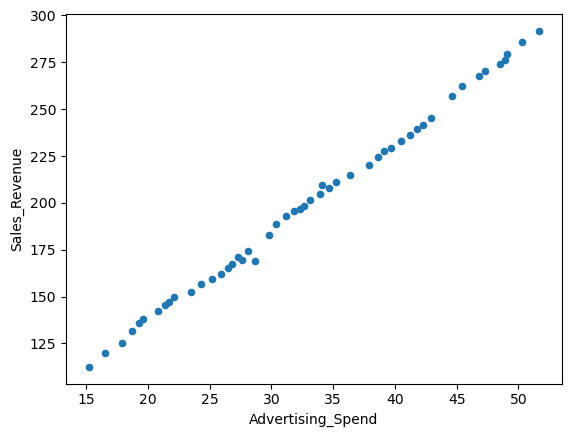

In [304]:
advertSales.plot(y='Sales_Revenue',x='Advertising_Spend',kind="scatter")

##### Model Building

In [305]:
# split the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [306]:
# import the model

from sklearn.linear_model import LinearRegression

# create a linear regression object

lr_model = LinearRegression()

# reshape the data before fitting
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)

# fit the model on the training data
lr_model.fit(X_train, Y_train)

LinearRegression()

##### Predictions

In [307]:
# Predicting training set results

Y_train_pred = lr_model.predict(X_train)

In [308]:
# predicting the test set

# Reshaping the test set data
X_test = X_test.reshape(-1,1)

# make the predictions
Y_pred = lr_model.predict(X_test)

In [309]:
# show first 10 for predicted and actual values

# create a dictionary of the predicted and actual values for the test set
data = {"Y_test_predicted":Y_pred.flatten().tolist(), "Y_test_Actual": Y_test}

actPredTest = pd.DataFrame(data)

# show first 10 rows
print(actPredTest.head(10))

print("----------------------------")

# create a dictionary of the predicted and actual values for the training set
data1 = {"Y_train_predicted":Y_train_pred.flatten().tolist(), "Y_train_Actual": Y_train.flatten().tolist()}

actPredTrain = pd.DataFrame(data1)

# show first 10 rows
print(actPredTrain.head(10))

   Y_test_predicted  Y_test_Actual
0        255.729433          256.8
1        203.725528          204.6
2        140.057196          142.5
3        132.766929          135.9
4        167.760211          165.3
5        276.628198          276.2
6        235.802703          233.2
7        129.850822          131.6
8        175.536496          174.3
9        207.613671          207.9
----------------------------
   Y_train_predicted  Y_train_Actual
0         215.875973           214.6
1         228.998454           227.8
2         242.120934           239.5
3         169.218264           167.1
4         125.962680           125.4
5         199.837386           201.5
6         239.204828           236.1
7         197.407297           198.3
8         190.603047           192.8
9         226.568365           224.7


##### Visualization

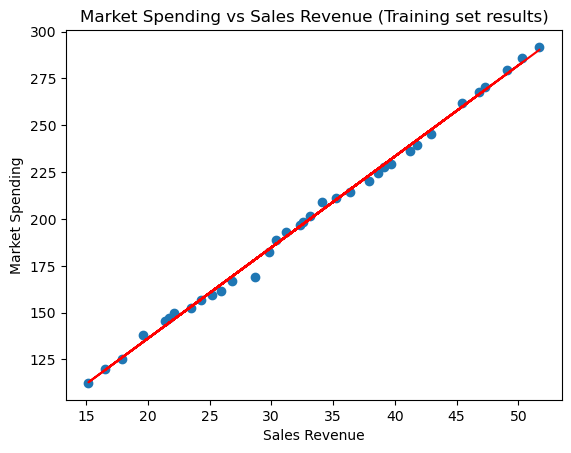

In [310]:
# Visualising results: Training set
plt.scatter(X_train, Y_train)
plt.plot(X_train, Y_train_pred,color='red')
plt.title('Market Spending vs Sales Revenue (Training set results)')
plt.xlabel('Sales Revenue')
plt.ylabel('Market Spending')
plt.show()

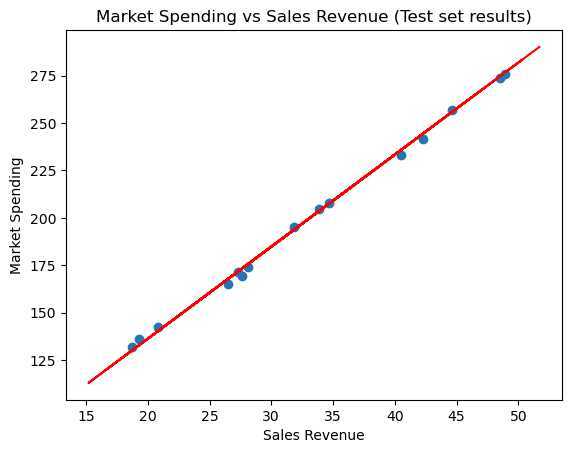

In [311]:
# Visualising results: Test set
plt.scatter(X_test, Y_test)
plt.plot(X_train, Y_train_pred,color='red')
plt.title('Market Spending vs Sales Revenue (Test set results)')
plt.xlabel('Sales Revenue')
plt.ylabel('Market Spending')
plt.show()

##### Model Evaluation

In [312]:
# import the evaluation libraries

from sklearn.metrics import mean_squared_error, r2_score

# Calculate the metrics for the training sets
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

# print the result of the performance metrics
print(f"The Mean Square Error for the training set is {train_mse}")
print(f"The Root Mean Square Error for the training set is {train_rmse}")
print(f"The R-Squared for the training set is {train_r2}")

The Mean Square Error for the training set is 7.2403875565144995
The Root Mean Square Error for the training set is 2.6907968255731425
The R-Squared for the training set is 0.9970183835851744


In [313]:
# Calculate the metrics for the test sets
test_mse = mean_squared_error(Y_test, Y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_pred)

# print the result of the performance metrics
print(f"The Mean Square Error for the test set is {test_mse}")
print(f"The Root Mean Square Error for the test set is {test_rmse}")
print(f"The R-Squared for the test set is {test_r2}")

The Mean Square Error for the test set is 4.057518903568578
The Root Mean Square Error for the test set is 2.014328400129576
The R-Squared for the test set is 0.99816296421656


### Metrics Performance Explanation

##### Business Insights

In [314]:
# Get the slope and intercept

lr_model_slope = lr_model.coef_[0]
lr_model_intercept = lr_model.intercept_

# print the equation 
print(f"The equation of the regression line is; y = {round(lr_model_slope[0],2)}x + {round(lr_model_intercept[0],2)}")

The equation of the regression line is; y = 4.86x + 38.97


In [315]:
# sales revenue for $50,000

result = lr_model.predict(np.array([50000]).reshape(-1,1))
print(f"The Sales Revenue for $50,000 Market Spending is: ${round(result[0][0],2)}")

The Sales Revenue for $50,000 Market Spending is: $243047.87


### Assignment 3: Multiple Linear Regression with Feature Selection
**Objective**: Build a multiple regression model and optimize it using backward elimination

**Scenario**: A startup company wants to predict their monthly profit based on various business metrics. You need to build a model and identify which factors most significantly impact profit.

**Dataset**: `Assignment-Datasets/assignment3_startup_profit.csv`

**Dataset Description**:
- **Check Data Dictionary**

**Tasks**:
1. **Data Preprocessing**:
   - Load and explore the dataset
   - Encode the categorical variable (Location)
   - Avoid the dummy variable trap
   - Split into training (80%) and test (20%) sets

2. **Initial Model**:
   - Build a multiple linear regression model using all features
   - Fit the model on training data
   - Make predictions on test set

3. **Model Evaluation (Initial)**:
   - Calculate R² score
   - Calculate adjusted R² score
   - Calculate MSE and RMSE

4. **Feature Selection using Backward Elimination**:
   - Add a column of ones for the intercept
   - Use statsmodels OLS to get p-values
   - Remove features with p-value > 0.05 iteratively
   - Document each step of elimination with justification

5. **Optimized Model**:
   - Rebuild the model with selected features only
   - Compare performance with initial model
   - Create a comparison table

6. **Visualization**:
   - Create a bar chart comparing actual vs predicted profits (top 10 samples)
   - Create a residual plot
   - Create a feature importance visualization

7. **Analysis Report**:
   - Which features were most significant?
   - How much did model performance improve after optimization?
   - What business recommendations can you provide?

**Deliverable**:
- Complete implementation
- Visualizations
- Comprehensive report (markdown) with:
  - Backward elimination steps documented
  - Model comparison table
  - Feature importance analysis
  - Business recommendations


##### Data Preprocessing

In [316]:
# Load the dataset

startupData = pd.read_csv(r"C:\Users\USER\Desktop\DataraFlow Internship\GitHub Pushing\Week 14\Week-14-Take-Home\Assignment-Datasets\assignment3_startup_profit.csv")

# view the first 5 rows of the data
startupData.head()

,RD_Spend,Marketing_Spend,Administration_Cost,Employee_Count,Location,Profit
0,165349,471784,136897,45,Urban,192261
1,162597,443898,151377,42,Suburban,191792
2,153441,407934,101145,38,Rural,191050
3,144372,383199,118671,35,Urban,182901
4,142107,366168,91391,33,Rural,166187


In [317]:
# check the data information

startupData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   RD_Spend             58 non-null     int64 
 1   Marketing_Spend      58 non-null     int64 
 2   Administration_Cost  58 non-null     int64 
 3   Employee_Count       58 non-null     int64 
 4   Location             58 non-null     object
 5   Profit               58 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.8+ KB


In [318]:
# check the summary statistic of the data

startupData.describe()

,RD_Spend,Marketing_Spend,Administration_Cost,Employee_Count,Profit
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,82991.948276,211601.275862,118752.586207,19.689655,112387.362069
std,48858.018559,119687.617990,45847.775093,11.848765,48411.302283
min,0.000000,51283.000000,0.000000,1.000000,13709.000000
25%,46117.000000,117373.750000,99844.750000,10.250000,73073.000000
50%,77528.500000,153402.500000,122106.500000,18.500000,103368.500000
75%,125567.750000,306414.250000,143951.250000,28.000000,149711.000000
max,165349.000000,471784.000000,297114.000000,45.000000,192261.000000


In [319]:
# split the data into features and target variable

X = startupData.drop("Profit", axis=1)
Y = startupData["Profit"]

In [320]:
# preview the features and target variable

print(X)
print("------------------")
print(Y)

    RD_Spend  Marketing_Spend  Administration_Cost  Employee_Count  Location
0     165349           471784               136897              45     Urban
1     162597           443898               151377              42  Suburban
2     153441           407934               101145              38     Rural
3     144372           383199               118671              35     Urban
4     142107           366168                91391              33     Rural
5     131876           362861                99814              31     Urban
6     134615           127716               147198              29  Suburban
7     130298           323876               145530              28     Rural
8     120542           311613               148718              27     Urban
9     123334           304981               108679              26  Suburban
10    101913           229160               110594              24     Rural
11    100671           249744                91790              23  Suburban

In [321]:
# Encode the categorical variable

categorical_feature = ["Location"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[('one_hot_encoder', 
                                                OneHotEncoder(), categorical_feature)], 
                                                remainder="passthrough")
# fit and transform the feature variable
X_transformed = preprocessor.fit_transform(X)

# print the transformed data
print(X_transformed)

[[     0.      0.      1. 165349. 471784. 136897.     45.]
 [     0.      1.      0. 162597. 443898. 151377.     42.]
 [     1.      0.      0. 153441. 407934. 101145.     38.]
 [     0.      0.      1. 144372. 383199. 118671.     35.]
 [     1.      0.      0. 142107. 366168.  91391.     33.]
 [     0.      0.      1. 131876. 362861.  99814.     31.]
 [     0.      1.      0. 134615. 127716. 147198.     29.]
 [     1.      0.      0. 130298. 323876. 145530.     28.]
 [     0.      0.      1. 120542. 311613. 148718.     27.]
 [     0.      1.      0. 123334. 304981. 108679.     26.]
 [     1.      0.      0. 101913. 229160. 110594.     24.]
 [     0.      1.      0. 100671. 249744.  91790.     23.]
 [     1.      0.      0.  93863. 249839. 127320.     22.]
 [     0.      1.      0.  91992. 252664. 135495.     21.]
 [     1.      0.      0. 119943. 256512. 156547.     25.]
 [     0.      0.      1. 114523. 261776. 122616.     28.]
 [     0.      1.      0.  78013. 264346. 121597.     19

In [322]:
# Avoid the dummy variable trap

X_transformed[:,1:]

array([[     0.,      1., 165349., 471784., 136897.,     45.],
       [     1.,      0., 162597., 443898., 151377.,     42.],
       [     0.,      0., 153441., 407934., 101145.,     38.],
       [     0.,      1., 144372., 383199., 118671.,     35.],
       [     0.,      0., 142107., 366168.,  91391.,     33.],
       [     0.,      1., 131876., 362861.,  99814.,     31.],
       [     1.,      0., 134615., 127716., 147198.,     29.],
       [     0.,      0., 130298., 323876., 145530.,     28.],
       [     0.,      1., 120542., 311613., 148718.,     27.],
       [     1.,      0., 123334., 304981., 108679.,     26.],
       [     0.,      0., 101913., 229160., 110594.,     24.],
       [     1.,      0., 100671., 249744.,  91790.,     23.],
       [     0.,      0.,  93863., 249839., 127320.,     22.],
       [     1.,      0.,  91992., 252664., 135495.,     21.],
       [     0.,      0., 119943., 256512., 156547.,     25.],
       [     0.,      1., 114523., 261776., 122616.,   

In [323]:
# converted the transformed data into DataFrame

X_transformed = pd.DataFrame(X_transformed[:,1:], 
                             columns=["Suburban","Urban", "RD_Spend",
                                      "Marketing_Spend","Administration_Cost",
                                      "Employee_Count"])

X_transformed.head()

,Suburban,Urban,RD_Spend,Marketing_Spend,Administration_Cost,Employee_Count
0,0.0,1.0,165349.0,471784.0,136897.0,45.0
1,1.0,0.0,162597.0,443898.0,151377.0,42.0
2,0.0,0.0,153441.0,407934.0,101145.0,38.0
3,0.0,1.0,144372.0,383199.0,118671.0,35.0
4,0.0,0.0,142107.0,366168.0,91391.0,33.0


In [324]:
# split the dataset into training and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.2, random_state=42)

In [325]:
X_train.columns

Index(['Suburban', 'Urban', 'RD_Spend', 'Marketing_Spend',
       'Administration_Cost', 'Employee_Count'],
      dtype='object')

From research I made, it is not a best practice to scale One Hot Encoding Variables, therefore, there is a need to split the data to exclude the One Hot Encoding columns and other columns

In [326]:
# define the columns to standardize
cols =['RD_Spend', 'Marketing_Spend',
       'Administration_Cost', 'Employee_Count']

# create the StandardScaler Object
scaler_X = StandardScaler()

# separate the columns to scale
X_train_OneHot = X_train[['Suburban', 'Urban']]
X_train_scale = scaler_X.fit_transform(X_train[cols])

In [327]:
# combine the data after scaling

X_train_final = pd.concat([X_train_OneHot, pd.DataFrame(X_train_scale, columns=cols, index=X_train.index)],axis=1)

In [328]:
# separate the columns to scale
X_test_OneHot = X_test[['Suburban', 'Urban']]
X_test_scale = scaler_X.transform(X_test[cols])

In [329]:
X_test_final = pd.concat([X_test_OneHot, pd.DataFrame(X_test_scale, columns=cols, index=X_test.index)],axis=1)

##### Initial Model

In [330]:
# Build a MLR model using all features and Fit the model to the Training set

from sklearn.linear_model import LinearRegression

# create a linear regression object
startupLR = LinearRegression()

# fit it to the training dataset
model = startupLR.fit(X_train_final, Y_train)

In [331]:
# Make predictions on the test set

startup_Y_pred = startupLR.predict(X_test_final)

##### Model Evaluation (Initial)

In [332]:
# calculate the performance metrics

from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE,RMSE and R-squared
mse = mean_squared_error(Y_test, startup_Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, startup_Y_pred)


# Calculate Adjusted R-squared
n = X_test_final.shape[0] # Number of observations
p = X_test_final.shape[1] # Number of features

adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))


# print the result of the performance metrics
print(f"The R-Squared is {r2:.4f}")
print(f"The Adjusted R-squared is {adjusted_r2:.4f}")
print(f"The Mean Square Error is {mse:.4f}")
print(f"The Root Mean Square Error is {rmse:.4f}")

The R-Squared is 0.9711
The Adjusted R-squared is 0.9364
The Mean Square Error is 99766474.2462
The Root Mean Square Error is 9988.3169


##### Feature Selection Using Backward Elimination

In [333]:
# import the stats model library
import statsmodels.api as sm

In [359]:
# Apply Backward Elimination with p-values = 0.05

# Add a column of ones for the intercept
startupXtrain = sm.add_constant(X_train_final)

# fit the OLS model
ols_model1 = sm.OLS(Y_train, startupXtrain).fit()

# print the summary
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     239.8
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           3.47e-29
Time:                        01:15:22   Log-Likelihood:                -474.29
No. Observations:                  46   AIC:                             962.6
Df Residuals:                      39   BIC:                             975.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.112e+05   2

The Backward Elimination method of optimization has the following steps:
- Start with All Features

- Evaluate Significance: Check the statistical significance of each feature using a chosen p-values (a high p-value means low significance)
- Remove Least Significant: Identify and remove the feature with the highest p-value (or smallest impact on performance).
- Refit and Repeat: Retrain the model with the remaining features and repeat steps 2-3.
- Stop: Continue until all remaining features have p-values below a chosen threshold (here, 0.05)

Based on this guide, we would retrain the model without the `Urban` column since it has the highest p-value (0.844) making it the least significant

In [338]:
# print the X_train after dropping the Urban column

startupXtrain.drop("Urban", axis=1)

,const,Suburban,RD_Spend,Marketing_Spend,Administration_Cost,Employee_Count
36,1.0,1.0,-1.195201,-0.701103,2.067789,-1.063677
31,1.0,0.0,-0.491914,-0.474006,-0.681953,-0.610629
8,1.0,0.0,0.794677,0.933222,0.791454,0.657904
17,1.0,0.0,0.234070,0.676071,0.702781,0.386075
6,1.0,1.0,1.099464,-0.695258,0.754436,0.839123
4,1.0,0.0,1.261723,1.416329,-0.604679,1.201561
41,1.0,0.0,-1.211899,-1.076093,1.175173,-1.154286
19,1.0,1.0,0.055655,-0.701059,-0.473485,0.023637
30,1.0,1.0,-0.473332,-0.802187,-0.611011,-0.610629
49,1.0,0.0,-1.815973,-0.790303,-1.730264,-1.697943


In [344]:
# fit the OLS model without the Urban column
ols_model = sm.OLS(Y_train, startupXtrain).fit()

# print the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     294.8
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           1.95e-30
Time:                        18:32:48   Log-Likelihood:                -474.31
No. Observations:                  46   AIC:                             960.6
Df Residuals:                      40   BIC:                             971.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.115e+05   1

From our results, we can see that the p-value of the Employee_Count column (0.511) is greater than 0.05 which makes it the least significant amongst other features, therefore we would retrain our model without the `Urban` and `Employee_Count` columns

In [347]:
# Drop the Employee_count column
startupXtrain.drop("Employee_Count", inplace=True, axis=1)

# fit the OLS model without the Urban and Employee_Count columns
ols_model = sm.OLS(Y_train, startupXtrain).fit()

# print the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     373.5
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           1.17e-31
Time:                        18:46:43   Log-Likelihood:                -474.57
No. Observations:                  46   AIC:                             959.1
Df Residuals:                      41   BIC:                             968.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.114e+05   1

From the above results, we can see that the p-value of the Administration_Cost column (0.344) is greater than 0.05 which makes it the least significant amongst other features present, therefore we would retrain our model without the `Urban`, `Employee_Count` and `Administration_Cost` columns

In [349]:
# Drop the Administration_Cost column
startupXtrain.drop("Administration_Cost", inplace=True, axis=1)

# fit the OLS model without the Urban, Employee_Count and Administration_Cost columns
ols_model = sm.OLS(Y_train, startupXtrain).fit()

# print the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     498.7
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           7.55e-33
Time:                        18:52:23   Log-Likelihood:                -475.07
No. Observations:                  46   AIC:                             958.1
Df Residuals:                      42   BIC:                             965.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.114e+05   1458.269     

From the above results, we can see that the p-value of the `Suburban` column (0.220) is greater than 0.05 which makes it the least significant amongst other features present, therefore we would retrain our model without the `Urban`, `Employee_Count`, `Administration_Cost` and `Suburban` columns

In [351]:
# Drop the Suburban column
startupXtrain.drop("Suburban", inplace=True, axis=1)

# fit the OLS model without the Urban, Employee_Count, Administration_Cost, and Suburban columns
ols_model = sm.OLS(Y_train, startupXtrain).fit()

# print the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     737.7
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           5.24e-34
Time:                        18:55:40   Log-Likelihood:                -475.91
No. Observations:                  46   AIC:                             957.8
Df Residuals:                      43   BIC:                             963.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.125e+05   1148.598     

From our results, we can see that the p-value of the `RD_Spend` and `Marketing_Spend` columns are (0.000) and (0.004) respectively which are lesser than 0.05 making them significant features for our model performance. I would then train the final model using only the two significant features

In [354]:
from sklearn.linear_model import LinearRegression

# Drop the constant column
startupXtrain = startupXtrain.drop('const', axis=1)

# Train with optimized features
final_model = LinearRegression()
final_model.fit(startupXtrain, Y_train)

# Prepare the test set with optimal features
X_test_optimal = X_test_final.drop(["Urban", "Employee_Count", "Administration_Cost", "Suburban"], axis=1)

# Predict
y_pred = final_model.predict(X_test_optimal)

# Evaluate the performance metrics

from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE,RMSE and R-squared
final_mse = mean_squared_error(Y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(Y_test, y_pred)


# Calculate Adjusted R-squared
n = X_test_optimal.shape[0] # Number of observations
p = X_test_optimal.shape[1] # Number of features

final_adjusted_r2 = 1 - (1 - final_r2) * ((n - 1) / (n - p - 1))


# print the result of the performance metrics
print(f"The R-Squared is {final_r2:.4f}")
print(f"The Adjusted R-squared is {final_adjusted_r2:.4f}")
print(f"The Mean Square Error is {final_mse:.4f}")
print(f"The Root Mean Square Error is {final_rmse:.4f}")

The R-Squared is 0.9741
The Adjusted R-squared is 0.9683
The Mean Square Error is 89591174.5050
The Root Mean Square Error is 9465.2615


In [358]:
import pandas as pd

# Create comparison dictionary
comparison_data = {
    'Metric': ['Number of Features', 'R² Score', 'Adjusted R²', 
               'RMSE', 'MSE'],
    'Initial Model': [
        X_train_final.shape[1],
        f'{r2:.4f}',
        f'{adjusted_r2:.4f}',
        f'{rmse:.2f}',
        f'{mse:.2f}'
    ],
    'Optimized Model': [
        startupXtrain.shape[1],
        f'{final_r2:.4f}',
        f'{final_adjusted_r2:.4f}',
        f'{final_rmse:.2f}',
        f'{final_mse:.2f}'
    ]
}

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Calculate improvement
comparison_df['Improvement'] = [
    f"{X_train_final.shape[1] - startupXtrain.shape[1]} features removed",
    f"{((final_r2 - r2) / r2 * 100):.2f}%",
    f"{((final_adjusted_r2 - adjusted_r2) / adjusted_r2 * 100):.2f}%",
    f"{((rmse - final_rmse) / rmse  * 100):.2f}%",
    f"{((mse - final_mse) / mse * 100):.2f}%"
]

# Display table
print("="*80)
print(" "*20 +"MODEL PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

                    MODEL PERFORMANCE COMPARISON
            Metric Initial Model Optimized Model        Improvement
Number of Features             6               2 4 features removed
          R² Score        0.9711          0.9741              0.30%
       Adjusted R²        0.9364          0.9683              3.40%
              RMSE       9988.32         9465.26              5.24%
               MSE   99766474.25     89591174.51             10.20%


##### Visualization

<Figure size 1200x600 with 0 Axes>

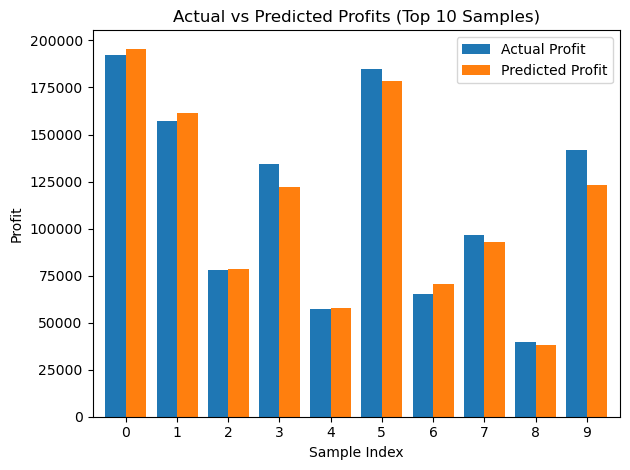

In [369]:
# Create dataframe with actual and predicted values
results_df = pd.DataFrame({
    'Actual Profit': Y_test.values,
    'Predicted Profit': y_pred
})

# Select top 10 samples
top_10 = results_df.head(10)

# Plot
plt.figure(figsize=(12, 6))
top_10.plot(kind='bar', width=0.8)
plt.title('Actual vs Predicted Profits (Top 10 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Profit')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


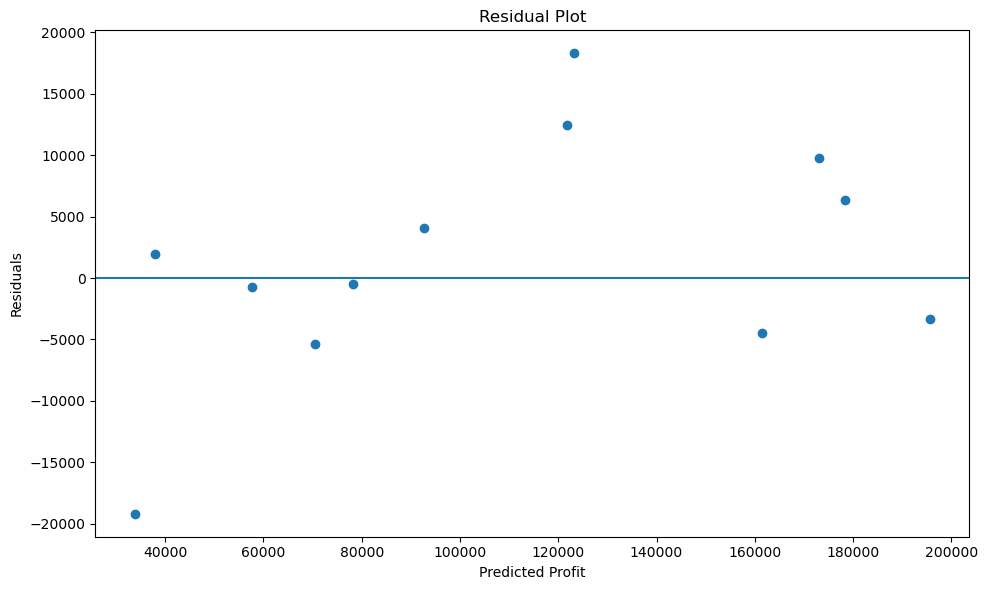

In [370]:
# Calculate residuals
residuals = Y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()


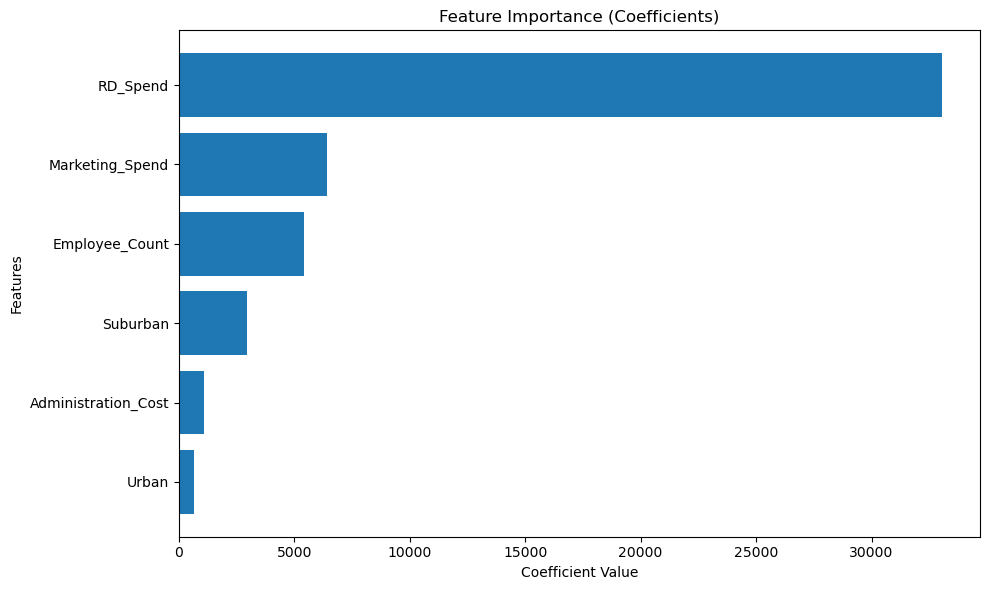

In [368]:
# Feature names
feature_names = ['Suburban', 'Urban', 'RD_Spend', 'Marketing_Spend', 
                 'Administration_Cost', 'Employee_Count']

# Coefficients (excluding intercept)
coefficients = ols_model1.params[1:]

# Convert to arrays
feature_names = np.array(feature_names)
coefficients = np.array(coefficients)

# Sort indices by coefficient value (descending)
sorted_idx = np.argsort(coefficients)[::-1]

# Apply sorting
sorted_features = feature_names[sorted_idx]
sorted_coefficients = coefficients[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance (Coefficients)')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()


#### Analysis Report

## Part 3: Assessment

### Real-World Project: Housing Price Prediction

**Objective**: Apply all learned concepts in a complete machine learning project

**Scenario**: You are a data scientist at a real estate company. The company wants to develop a model to predict house prices based on various features to help with property valuation.

**Dataset**: `Assessment-Dataset/housing_price_data.csv`

**Dataset Description**:
- **Check Data Dictionary**

**Project Requirements**:

### Phase 1: Data Understanding & Preprocessing
1. Load and perform exploratory data analysis (EDA):
   - Dataset shape and structure
   - Statistical summaries
   - Distribution of target variable
   - Correlation analysis with heatmap

2. Data Quality Assessment:
   - Identify and handle missing values
   - Detect and handle outliers if any
   - Document all data quality observations

3. Complete Preprocessing Pipeline:
   - Encode categorical variables appropriately (Neighborhood, Garage, Pool)
   - Handle dummy variable trap
   - Split data (70% train, 30% test)
   - Apply feature scaling where appropriate

### Phase 2: Model Development
1. Build and compare TWO models:
   - **Model 1**: Multiple Linear Regression with all features
   - **Model 2**: Optimized Multiple Linear Regression (after feature selection)

2. For each model, perform:
   - Training on training set
   - Predictions on test set
   - Complete evaluation metrics:
     - R² score
     - Adjusted R² score
     - Mean Absolute Error (MAE)
     - Mean Squared Error (MSE)
     - Root Mean Squared Error (RMSE)

3. Feature Selection:
   - Apply backward elimination (significance level = 0.05)
   - Document each elimination step
   - Justify the final feature set

### Phase 3: Model Evaluation & Validation
1. Create comprehensive visualizations:
   - Scatter plot: Predicted vs Actual prices (both models)
   - Residual plots (both models)
   - Feature importance/coefficient visualization
   - Distribution of prediction errors

2. Model Comparison:
   - Create a comparison table
   - Analyze which model performs better
   - Discuss overfitting/underfitting if present

3. Cross-validation (Bonus):
   - Implement k-fold cross-validation
   - Report average scores

### Phase 4: Business Insights & Recommendations
1. Interpret the model:
   - Which features most strongly influence house prices?
   - What is the price impact of each significant feature?
   - Are there any surprising findings?

2. Provide actionable recommendations:
   - How can the real estate company use this model?
   - What are the limitations of the current model?
   - What improvements would you suggest?

3. Make sample predictions:
   - Create 3 hypothetical houses with different characteristics
   - Predict their prices
   - Explain the predictions

**Deliverables**:
1. **With**:
   - Well-organized sections matching project phases
   - Clear markdown cells for explanations
   - Clean, commented code
   - All visualizations embedded

2. **Your Code** must contain:
   - Reusable preprocessing function
   - Model training function
   - Evaluation function

3. **Comprehensive Report** (In a Markdown Cell With):
   - Executive summary
   - Methodology
   - Results and findings
   - Recommendations
   - Appendix with key visualizations

**Note**: The dataset `Assessment-Dataset/housing_price_data.csv` is provided for you.


### Phase 1: Data Understanding & Preprocessing

##### Load and perform exploratory data analysis (EDA)

In [371]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [372]:
# Load the housing dataset

housing_data = pd.read_csv(r"C:\Users\USER\Desktop\DataraFlow Internship\GitHub Pushing\Week 14\Week-14-Take-Home\Assessment-Dataset\housing_price_data.csv")

# view the first 5 rows of the dataset
housing_data.head()

,Area,Bedrooms,Bathrooms,Age,Distance_City_Center,Nearby_Schools,Property_Tax,Neighborhood,Garage,Pool,House_Price
0,2100,3,2,5,3.2,4,4200,Standard,Yes,No,425000
1,1850,3,2,8,5.1,3,3800,Standard,Yes,No,385000
2,2450,4,3,3,2.8,5,5100,Luxury,Yes,Yes,625000
3,1650,2,1,12,7.3,2,3200,Budget,No,No,285000
4,3200,5,4,2,1.5,6,7500,Luxury,Yes,Yes,895000


Data Quality Assessment:

Complete Preprocessing Pipeline:

### Phase 2: Model Development

Build and compare TWO models:



2. For each model, perform:
   - Training on training set
   - Predictions on test set
   - Complete evaluation metrics:
     - R² score
     - Adjusted R² score
     - Mean Absolute Error (MAE)
     - Mean Squared Error (MSE)
     - Root Mean Squared Error (RMSE)

Feature Selection:

### Phase 3: Model Evaluation & Validation

Create comprehensive visualizations:

Model Comparison:

Cross-validation (Bonus)

### Phase 4: Business Insights & Recommendations

## Bonus Challenges

If you want to go beyond:

1. **Advanced Feature Engineering**:
   - Create polynomial features
   - Implement feature interactions
   - Compare performance

2. **Alternative Regression Techniques**:
   - Try Ridge Regression
   - Try Lasso Regression
   - Compare with standard linear regression

3. **Hyperparameter Tuning**:
   - Use GridSearchCV for model optimization
   - Document the improvement

4. **Real-World Dataset**:
   - Find a dataset from Kaggle or UCI ML Repository
   - Apply all learned techniques
   - Present findings


## Link to your publication

**Good luck with your assignments! Remember, the goal is not just to complete the tasks, but to truly understand the concepts and be able to apply them to real-world problems.** 

## Merry Christmas !